In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing:

# 1. Import the necessary libraries and read the data.

In [2]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df=pd.read_csv('fifa_+variable_information.csv')
df.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [4]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

# 2. Drop any columns that you deem unecessary for analysis.

In [5]:
fifa.drop(['Photo','Flag','Club Logo','Jersey Number'],axis=1,inplace=True)

In [6]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [25]:
cat_col=fifa.select_dtypes(include='object')
num_col=fifa.select_dtypes(include=np.number)
print('category variables columns are',cat_col.columns)
print('continues variable columns are',num_col.columns)

category variables columns are Index(['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Loaned From'],
      dtype='object')
continues variable columns are Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Joined',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')


# 3. The following columns need to be converted for further analysis:

In [8]:
fifa['Value'] = fifa['Value'].str.replace('€', '')
fifa['Value'] = fifa['Value'].str.replace('M', '')
fifa['Value'] = fifa['Value'].str.replace('K', '')
fifa['Value'] = fifa['Value'].astype(float)

In [9]:
fifa['Wage'] = fifa['Wage'].str.replace('€', '')
fifa['Wage'] = fifa['Wage'].str.replace('K', '')
fifa['Wage'] = fifa['Wage'].astype(float)

In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [11]:
fifa['Joined'] = pd.to_datetime(fifa['Joined']).dt.year

In [ ]:
fifa['Joined'].fillna(0,inplace=True)

In [14]:
fifa['Joined']= (fifa['Joined'].astype(int))

In [15]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [16]:
fifa['Height'] = fifa['Height'].str.replace("'", '.')

In [17]:
fifa['Height']= (fifa['Height'].astype(float))

In [18]:
fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [19]:
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [20]:
fifa['Weight'] = fifa['Weight'].str.replace('lbs', '')

In [21]:
fifa['Weight'] = fifa['Weight'].astype(float)

In [22]:
fifa['Release Clause'] = fifa['Release Clause'].str.replace('€', '')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('M', '')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('K', '')
fifa['Release Clause'] = fifa['Release Clause'].astype(float)

# 4. Check for missing values and do a mean imputation where necessary.

In [26]:
x=num_col.columns[2:]
x

Index(['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Joined', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [27]:
value={}
for i in x:
    value.update({i:np.mean(fifa[i])})
print(value)

{'Overall': 66.23869940132916, 'Potential': 71.30729939034437, 'Value': 265.0269292030542, 'Wage': 9.731312132696216, 'International Reputation': 1.1132220937276283, 'Weak Foot': 2.9472988600693872, 'Skill Moves': 2.361308442094829, 'Joined': 1844.4621299500193, 'Height': 5.797367145768057, 'Weight': 165.97912880665234, 'Crossing': 49.734181397654055, 'Finishing': 45.55091139379922, 'HeadingAccuracy': 52.29814417093452, 'ShortPassing': 58.68671182333829, 'Volleys': 42.9090258274134, 'Dribbling': 55.37100060576023, 'Curve': 47.170824384602675, 'FKAccuracy': 42.863153257337956, 'LongPassing': 52.711933476513025, 'BallControl': 58.369458670631644, 'Acceleration': 64.61407566495953, 'SprintSpeed': 64.72696734401674, 'Agility': 63.503607026818656, 'Reactions': 61.83660994548158, 'Balance': 63.966573049176716, 'ShotPower': 55.46004735943609, 'Jumping': 65.08943223745801, 'Stamina': 63.2199460322705, 'Strength': 65.31196651798007, 'LongShots': 47.10997301613525, 'Aggression': 55.8689905831818

In [28]:
fifa.fillna(value=value,inplace=True)

In [29]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                      48
Body Type                      48
Position                       60
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy                      0
LongPassing   

# Exploratory Analysis:

# 1. Plot the distribution of Overall rating for all players. 

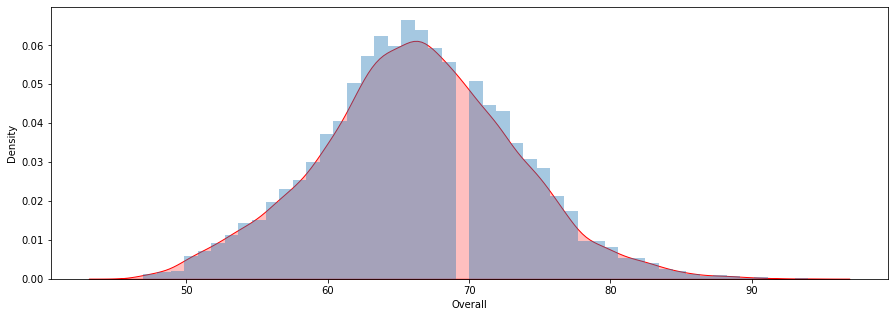

In [35]:
plt.figure(figsize=(15,5))
sns.distplot(fifa.Overall,kde_kws={'shade':True,'color':'r'})
plt.show()

# 2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


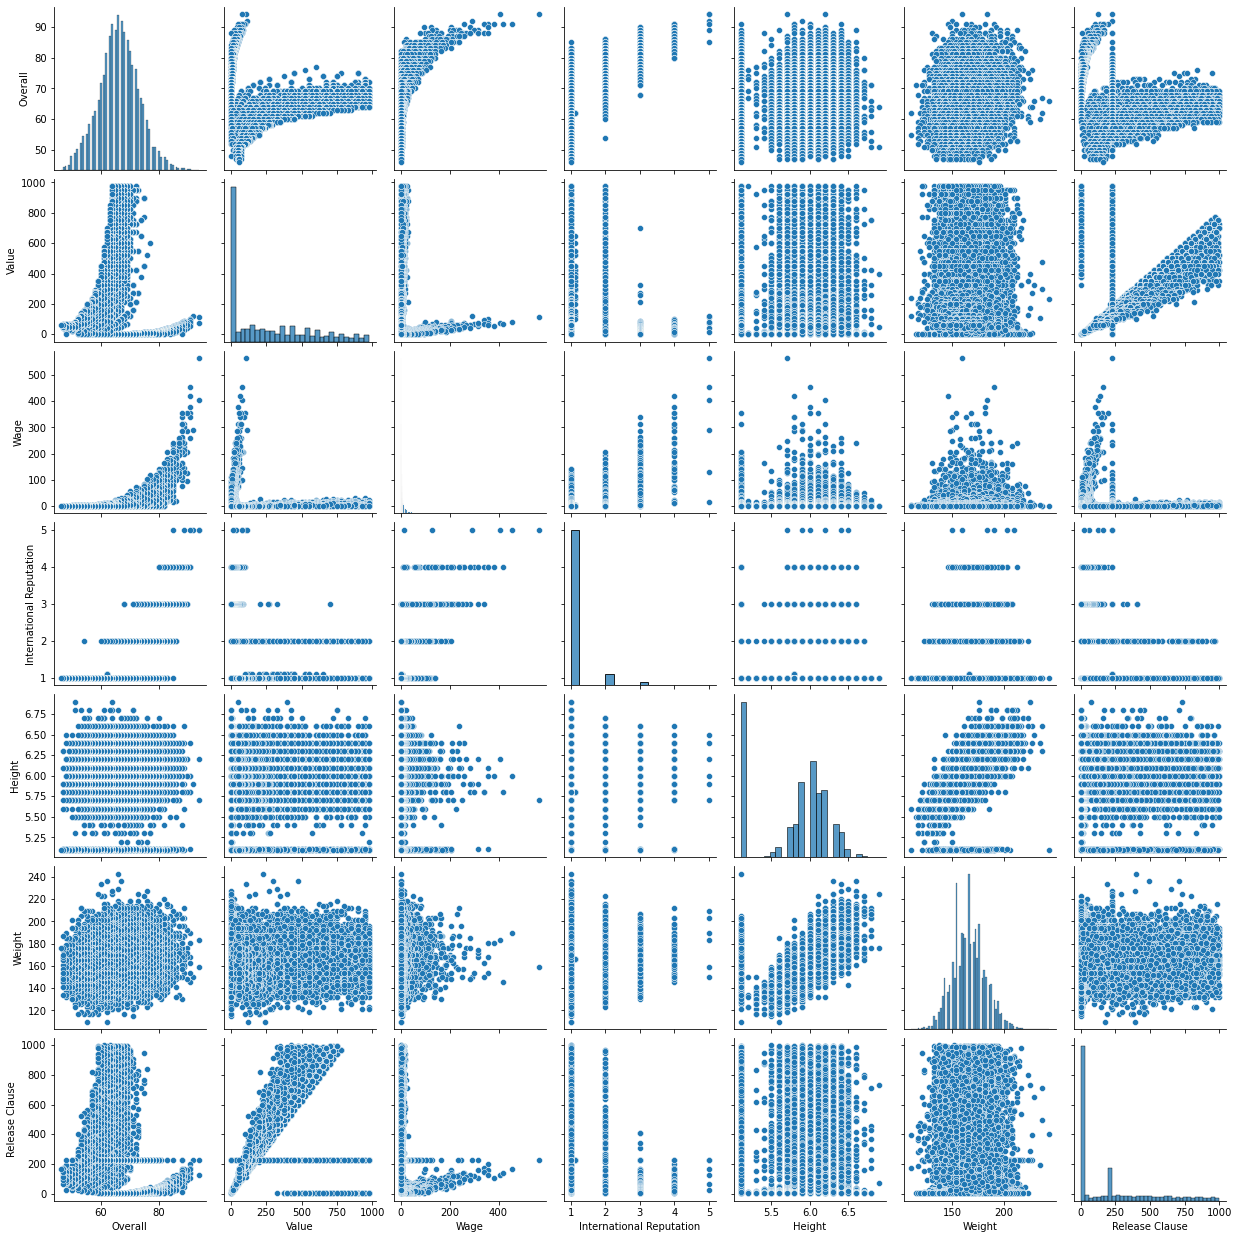

In [36]:
sns.pairplot(fifa[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])
plt.show()

# 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [77]:
y=list(fifa[(fifa['Contract Valid Until']=='2020-01-01')]['Overall'].sort_values(ascending=False).head(20).index)
x=fifa.iloc[y]
x

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,420.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,380.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
13,168542,David Silva,32,Spain,90,90,Manchester City,60.0,285.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60.0,200.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27.0,215.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73.5,205.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24.0,165.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44.4
46,193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30.5,195.0,Right,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62.5


a) What would the average wage for this set of players be?

In [78]:
x['Wage'].mean()

205.15

b) What is the average age?

In [79]:
x['Age'].mean()

29.95

c) Is there a correlation between the Overall rating and Value for these players?

In [84]:
a=x['Overall'].corr(x['Value'])
a

0.6667878068079505

In [86]:
b=x[['Overall','Value']]
b

<AxesSubplot:>

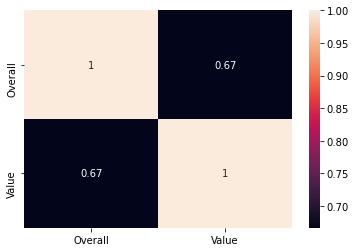

In [88]:
sns.heatmap(b.corr(),annot=True)

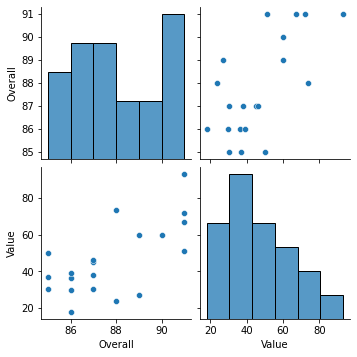

In [90]:
sns.pairplot(b)
plt.show()

# 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [110]:
d=fifa['Position'].unique()
x=[]
for i in d:
    x.extend(list(fifa[fifa['Position']==i]['Overall'].sort_values(ascending=False).head(5).index))
new=fifa.iloc[x]
new

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.500000
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45.0,135.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.500000
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11.5,12.0,Right,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17.300000
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6.5,11.0,Left,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8.100000
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6.5,17.0,Left,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14.5,37.0,Left,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25.700000
581,223682,Granell,29,Spain,79,79,Girona FC,12.0,37.0,Left,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25.200000
601,210455,Jonny,24,Spain,79,83,Wolverhampton Wanderers,13.5,43.0,Right,...,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,228.201274
605,208334,J. Hector,28,Germany,79,79,1. FC Köln,10.0,26.0,Left,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15.000000


a) Are there any players appearing in more than one Table. Please point out such players

In [116]:
d=new['Name'].unique()
d.shape

(135,)

In [ ]:
# There is no player appearing more than one table
# Here we can use the unique function to get the uniqu player names,
# Both DateFrames have the same shapes so we can finalize that there is no player appearing twise

b) What is the average wage one can expect to pay for the top 5 in every position?

In [122]:
d=fifa['Position'].unique()
for i in d:
    print('Position :',i,'/  Wage :',new[new['Position']==i]['Wage'].mean(),'\n')

Position : RF /  Wage : 148.0 

Position : ST /  Wage : 294.0 

Position : LW /  Wage : 261.0 

Position : GK /  Wage : 192.8 

Position : RCM /  Wage : 240.8 

Position : LF /  Wage : 123.2 

Position : RS /  Wage : 132.2 

Position : RCB /  Wage : 231.0 

Position : LCM /  Wage : 184.4 

Position : CB /  Wage : 139.6 

Position : LDM /  Wage : 126.6 

Position : CAM /  Wage : 174.0 

Position : CDM /  Wage : 217.0 

Position : LS /  Wage : 130.2 

Position : LCB /  Wage : 162.0 

Position : RM /  Wage : 131.4 

Position : LAM /  Wage : 81.6 

Position : LM /  Wage : 164.6 

Position : LB /  Wage : 177.2 

Position : RDM /  Wage : 105.0 

Position : RW /  Wage : 202.0 

Position : CM /  Wage : 130.6 

Position : RB /  Wage : 155.4 

Position : RAM /  Wage : 45.4 

Position : CF /  Wage : 47.4 

Position : RWB /  Wage : 44.2 

Position : LWB /  Wage : 34.2 

Position : nan /  Wage : nan 

